In [1]:
from IPython.display import display
import misc
import matplotlib as mpl
import os
import re
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import rcParams
from scipy.stats import pearsonr, fisher_exact
from collections import defaultdict
import matplotlib.pyplot as plt
import yaml
import sys
from sklearn.metrics import roc_auc_score

from misc import rename_cytokines, rename_CMs, rename_factors, rename_Y, make_annot, convert_partial_year, rename_blood, rename_pathways, get_phenotype_contrasts
from misc import coef_col, pval_col, padj_col
import bcg_utils as fisher_enrichment
import bcg_utils as utils

%load_ext autoreload
%autoreload 1
%aimport misc
%aimport bcg_utils
%aimport bcg_colors

from bcg_colors import *

Using this peak annotation: ../data/DE/peaks_filtered_PBMC.csv.gz
thm.innate_nonspecific_24h_wo_LAC_IL10_IL1ra_V3_FC1.2_R: number of regions with <= FDR 0.1: 63
thm.innate_nonspecific_24h_wo_LAC_IL10_IL1ra_V3_FC1.2_R: number of regions with <= FDR 0.1 UP: 31
thm.innate_nonspecific_24h_wo_LAC_IL10_IL1ra_V3_FC1.2_R: number of regions with <= FDR 0.1 DOWN: 32


,Coef.thm.innate_nonspecific_24h_wo_LAC_IL10_IL1ra_V3_FC1.2_R,p.value.thm.innate_nonspecific_24h_wo_LAC_IL10_IL1ra_V3_FC1.2_R,padj.thm.innate_nonspecific_24h_wo_LAC_IL10_IL1ra_V3_FC1.2_R,chr,start,end,feat_anchor,distance,feat_type,characterization,gene_name
CONS00000045462,0.326600,9.188630e-07,0.032787,chr3,69281806,69282820,center,73369.0,gene:protein_coding,gene_body,FRMD4B
CONS00000151360,0.311799,1.023569e-06,0.032787,chr11,108733247,108734126,start,68618.0,gene:protein_coding,gene_body,DDX10
CONS00000216537,0.236924,2.588540e-06,0.055278,chr21,25456472,25457908,start,25489.0,gene:lncRNA,intergenic,LINC00158
CONS00000158808,-0.210157,3.666170e-06,0.058718,chr12,57224629,57225870,end,1200.0,gene:protein_coding,gene_body,NXPH4
CONS00000033797,0.369947,7.084982e-06,0.074581,chr2,181306615,181307300,center,59259.0,gene:lncRNA,gene_body,LINC01934
CONS00000210257,-0.181084,1.032690e-05,0.074581,chr19,55639891,55642038,start,37.0,transcript:protein_coding,TSS,ZNF580
CONS00000060081,0.186776,1.069947e-05,0.074581,chr4,56757230,56758624,start,63815.0,gene:protein_coding,intergenic,SPINK2
CONS00000064244,0.300778,1.157075e-05,0.074581,chr4,113692423,113693660,start,68886.0,gene:protein_coding,gene_body,CAMK2D
CONS00000170255,0.285072,1.202322e-05,0.074581,chr13,79385580,79386892,start,20241.0,gene:protein_coding,gene_body,RBM26
CONS00000053559,0.267326,1.293197e-05,0.074581,chr3,171255101,171256120,center,3800.0,gene:protein_coding,gene_body,TNIK


(-0.7256517429327151, 0.5465269397034022)


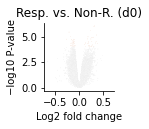

,hg38_region,LFC,tval,pval,padj,TSS_PROXIMAL:gene_ensembl,TSS_PROXIMAL:gene_name,GENE_AND_DISTAL_10kb:gene_ensembl,GENE_AND_DISTAL_10kb:gene_name
peak_id,,,,,,,,,
CONS00000045462,chr3:69281806:69282820,0.326600,4.951616,9.188630e-07,0.032787,<NA>,<NA>,ENSG00000114541,FRMD4B
CONS00000151360,chr11:108733247:108734126,0.311799,4.929857,1.023569e-06,0.032787,<NA>,<NA>,ENSG00000178105,DDX10
CONS00000216537,chr21:25456472:25457908,0.236924,4.739233,2.588540e-06,0.055278,<NA>,<NA>,<NA>,<NA>
CONS00000158808,chr12:57224629:57225870,-0.210157,-4.665990,3.666170e-06,0.058718,<NA>,<NA>,ENSG00000182379,NXPH4
CONS00000033797,chr2:181306615:181307300,0.369947,4.524550,7.084982e-06,0.074581,<NA>,<NA>,<NA>,<NA>


thm.innate_nonspecific_24h_wo_LAC_IL10_IL1ra_V3_FC1.2_R.V2: number of regions with <= FDR 0.1: 7233
thm.innate_nonspecific_24h_wo_LAC_IL10_IL1ra_V3_FC1.2_R.V2: number of regions with <= FDR 0.1 UP: 4123
thm.innate_nonspecific_24h_wo_LAC_IL10_IL1ra_V3_FC1.2_R.V2: number of regions with <= FDR 0.1 DOWN: 3110


,Coef.thm.innate_nonspecific_24h_wo_LAC_IL10_IL1ra_V3_FC1.2_R.V2,p.value.thm.innate_nonspecific_24h_wo_LAC_IL10_IL1ra_V3_FC1.2_R.V2,padj.thm.innate_nonspecific_24h_wo_LAC_IL10_IL1ra_V3_FC1.2_R.V2,chr,start,end,feat_anchor,distance,feat_type,characterization,gene_name
CONS00000218411,0.160258,1.923315e-09,0.000083,chr21,46228138,46229895,start,192.0,transcript:protein_coding,TSS_proximal,LSS
CONS00000000109,0.300694,4.043128e-09,0.000083,chr1,1539388,1541015,start,149.0,transcript:protein_coding,TSS_proximal,TMEM240
CONS00000179163,0.210383,6.128474e-09,0.000083,chr14,103520562,103522066,center,65.0,gene:protein_coding,gene_body,CKB
CONS00000083430,0.158342,7.316700e-09,0.000083,chr5,177005526,177007222,start,34.0,transcript:protein_coding,TSS,UIMC1
CONS00000043924,0.126596,7.512832e-09,0.000083,chr3,48300157,48302248,start,103.0,transcript:protein_coding,TSS_proximal,NME6
CONS00000092417,-0.145249,7.778296e-09,0.000083,chr6,106520643,106521315,end,50999.0,gene:protein_coding,gene_body,CRYBG1
CONS00000147994,0.180310,1.017240e-08,0.000093,chr11,66370941,66372817,start,59.0,transcript:protein_coding,TSS,SLC29A2
CONS00000122754,0.123142,1.182770e-08,0.000095,chr8,143245771,143247666,start,102.0,transcript:protein_coding,TSS_proximal,ZFP41
CONS00000207094,0.170331,1.491390e-08,0.000106,chr19,18436807,18438516,start,352.0,transcript:protein_coding,TSS_proximal,ISYNA1
CONS00000221501,0.167028,1.745843e-08,0.000107,chr22,46249841,46251148,start,201.0,transcript:protein_coding,TSS_proximal,CDPF1


(-0.31496016464822635, 0.3300112453362004)


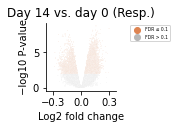

,hg38_region,LFC,tval,pval,padj,TSS_PROXIMAL:gene_ensembl,TSS_PROXIMAL:gene_name,GENE_AND_DISTAL_10kb:gene_ensembl,GENE_AND_DISTAL_10kb:gene_name
peak_id,,,,,,,,,
CONS00000218411,chr21:46228138:46229895,0.160258,6.086782,1.923315e-09,0.000083,ENSG00000160285,LSS,ENSG00000160285,LSS
CONS00000000109,chr1:1539388:1541015,0.300694,5.958914,4.043128e-09,0.000083,ENSG00000205090,TMEM240,ENSG00000205090,TMEM240
CONS00000179163,chr14:103520562:103522066,0.210383,5.885370,6.128474e-09,0.000083,<NA>,<NA>,ENSG00000166165,CKB
CONS00000083430,chr5:177005526:177007222,0.158342,5.853816,7.316700e-09,0.000083,ENSG00000087206,UIMC1,ENSG00000087206,UIMC1
CONS00000043924,chr3:48300157:48302248,0.126596,5.849206,7.512832e-09,0.000083,ENSG00000172113,NME6,ENSG00000172113,NME6


thm.innate_nonspecific_24h_wo_LAC_IL10_IL1ra_V3_FC1.2_R.V3: number of regions with <= FDR 0.1: 74
thm.innate_nonspecific_24h_wo_LAC_IL10_IL1ra_V3_FC1.2_R.V3: number of regions with <= FDR 0.1 UP: 54
thm.innate_nonspecific_24h_wo_LAC_IL10_IL1ra_V3_FC1.2_R.V3: number of regions with <= FDR 0.1 DOWN: 20


,Coef.thm.innate_nonspecific_24h_wo_LAC_IL10_IL1ra_V3_FC1.2_R.V3,p.value.thm.innate_nonspecific_24h_wo_LAC_IL10_IL1ra_V3_FC1.2_R.V3,padj.thm.innate_nonspecific_24h_wo_LAC_IL10_IL1ra_V3_FC1.2_R.V3,chr,start,end,feat_anchor,distance,feat_type,characterization,gene_name
CONS00000086668,0.119825,0.000001,0.037593,chr6,29632164,29633821,start,143.0,transcript:protein_coding,TSS_proximal,GABBR1
CONS00000194242,0.103132,0.000002,0.037593,chr17,36534113,36535928,start,32.0,transcript:protein_coding,TSS,MYO19
CONS00000218417,0.122567,0.000002,0.037593,chr21,46285516,46287037,start,21.0,transcript:protein_coding,TSS,MCM3AP
CONS00000195750,0.149123,0.000003,0.040093,chr17,50541610,50542704,end,1593.0,gene:protein_coding,gene_body,EPN3
CONS00000075525,-0.285953,0.000003,0.040093,chr5,80846185,80847028,end,30209.0,gene:protein_coding,gene_body,MSH3
CONS00000195842,0.127810,0.000004,0.040093,chr17,51165598,51167553,start,12.0,transcript:protein_coding,TSS,NME2
CONS00000042518,-0.283948,0.000006,0.051769,chr3,32963688,32964478,start,12510.0,gene:protein_coding,intergenic,CCR4
CONS00000043924,0.098103,0.000006,0.051769,chr3,48300157,48302248,start,103.0,transcript:protein_coding,TSS_proximal,NME6
CONS00000141781,0.139985,0.000010,0.070272,chr10,119541475,119543863,start,50.0,transcript:protein_coding,TSS,RGS10
CONS00000213702,0.128315,0.000012,0.070272,chr20,44650828,44653084,start,257.0,transcript:protein_coding,TSS_proximal,ADA


(-0.3677212746519158, 0.3356384902706419)


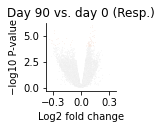

,hg38_region,LFC,tval,pval,padj,TSS_PROXIMAL:gene_ensembl,TSS_PROXIMAL:gene_name,GENE_AND_DISTAL_10kb:gene_ensembl,GENE_AND_DISTAL_10kb:gene_name
peak_id,,,,,,,,,
CONS00000086668,chr6:29632164:29633821,0.119825,4.904476,0.000001,0.037593,ENSG00000204681,GABBR1,ENSG00000204681,GABBR1
CONS00000194242,chr17:36534113:36535928,0.103132,4.839835,0.000002,0.037593,ENSG00000278259,MYO19,ENSG00000278259,MYO19
CONS00000218417,chr21:46285516:46287037,0.122567,4.819240,0.000002,0.037593,ENSG00000160294,MCM3AP,ENSG00000160294,MCM3AP
CONS00000195750,chr17:50541610:50542704,0.149123,4.689476,0.000003,0.040093,<NA>,<NA>,ENSG00000049283,EPN3
CONS00000075525,chr5:80846185:80847028,-0.285953,-4.677059,0.000003,0.040093,<NA>,<NA>,ENSG00000113318,MSH3


In [43]:
CELLTYPE = 'PBMC'
MODEL_TEMPLATE = 'donor_as_mixed.batch.sex.age.blood.TSS_enr.visit_time.thm.{}_V3_FC1.2_responder'
ATAC_FDR = [0.1]

for phenotype, color, xticks_list, xlim_list, legend_list, fig_ns in [
    ('innate_nonspecific_24h_wo_LAC_IL10_IL1ra', ORANGE,
     [[-0.5, 0, 0.5], [-0.3, 0, 0.3], [-0.3, 0, 0.3]],
     [[-0.73, 0.73], [-0.375, 0.375], [-0.375, 0.375]],
     [False, True, False],
     ['7D', '7B', '7C']),
]:
    contrasts = get_phenotype_contrasts(phenotype)
    de_df = misc.read_de(celltype=CELLTYPE, model=MODEL_TEMPLATE.format(phenotype), contrasts=contrasts.keys(), annot_fn=misc.PEAK_ANNOT_ALL_FN)
    for coef, xlim, xticks, legend, fig_n in zip(contrasts, xlim_list, xticks_list, legend_list, fig_ns):
        print('{}: number of regions with <= FDR {}: {}'.format(coef, np.min(ATAC_FDR), (de_df['padj.{}'.format(coef)] <= np.min(ATAC_FDR)).sum()))
        print('{}: number of regions with <= FDR {} UP: {}'.format(coef, np.min(ATAC_FDR), ((de_df['padj.{}'.format(coef)] <= np.min(ATAC_FDR)) & (de_df['Coef.{}'.format(coef)] > 0)).sum()))
        print('{}: number of regions with <= FDR {} DOWN: {}'.format(coef, np.min(ATAC_FDR), ((de_df['padj.{}'.format(coef)] <= np.min(ATAC_FDR)) & (de_df['Coef.{}'.format(coef)] < 0)).sum()))
        display(de_df.sort_values(misc.pval_col(coef)).head(10)[[misc.coef_col(coef), misc.pval_col(coef), misc.padj_col(coef), 'chr', 'start', 'end', 'feat_anchor', 'distance', 'feat_type', 'characterization', 'gene_name']])

        ax = misc.volcano(de_df, contrasts=coef,
                          fdr=ATAC_FDR, fdr_with_hue=True, hue=None, sharex=False, sharey=True,
                          fdr_pass_color=color, fdr_fail_color=LIGHT_GRAY, rasterized=RASTER,
                          fdr_prefix='FDR ', legend_kwargs=dict(bbox_to_anchor=(1.8, 1), title=None, markerscale=None, fontsize=SMALL_FONT),
                          scatter_kwargs=dict(linewidth=0.4),
                          figsize=(1.25, 1.25), size=0.2, alpha=1, legend=legend, centre=False,
                         )[0]
        print(ax.get_xlim())
        assert (de_df[misc.coef_col(coef)] <= xlim[0]).sum() == 0
        assert (de_df[misc.coef_col(coef)] >= xlim[1]).sum() == 0
        ax.set_xlim(xlim)
        if xticks:
            ax.set_xticks(xticks)
        ax.set_title(contrasts[coef][0])
        plt.show()
        
        suppl_df = misc.suppl_table_atac_seq_LFC(
            de_df, coef, contrasts[coef][0], comparison_text=contrasts[coef][2],
            limit_top_n=None, enr_top_n=None, enr_rank_metric=None, plot_enr_top_n_pvals=False,
            gene_columns=['gene_id', 'gene_name'], rename_regions_to_coord=False)

        for region_filter in [utils.TSS_PROXIMAL, utils.GENE_AND_DISTAL_10kb]:
            suppl_df[f'{region_filter}:gene_id'] = suppl_df[f'{region_filter}:gene_id'].str.rsplit('.', n=1, expand=True)[0]
            suppl_df = suppl_df.rename({f'{region_filter}:gene_id': f'{region_filter}:gene_ensembl'}, axis=1)

        suppl_df = suppl_df.reset_index().set_index('Region')
        suppl_df = suppl_df.rename({L2FC_COL: 'LFC', COEF_COL: 'coef', T_COL: 'tval',
                                    F_COL: 'fval', PVAL_COL: 'pval', PADJ_COL: 'padj',
                                   COMPARISON_COL: 'hg38_region'}, axis=1)
        suppl_df['hg38_region'] = misc.rename_regions(suppl_df.index, peaks_df=de_df.loc[suppl_df.index]).str.replace('_', ':')
        suppl_df.index.name = 'peak_id'
        suppl_df.to_csv(f'TRIM.{contrasts[coef][1]}.csv')
        display(suppl_df.head())